# Decision Tree Lab

In [2]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## 1 Debug and Eval

### 1.1 (5%) Debug

- Train a DecisionTreeClassifier on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff) using all default parameters.
- If using Dataframes you may want to change the class values from bytecodes to strings with
iris_df['class'] = iris_df['class'].str.decode('utf-8')

Expected Accuracy = [1.0]


In [3]:
#Debug
iris = load_iris()
data = iris.data
target = iris.target

y = pd.get_dummies(target).values

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
DTC.fit(X_train, y_train)
print(DTC.score(X_train, y_train))
print(DTC.score(X_test, y_test))

1.0
1.0


### 1.2 (5%) Evaluation

- Train on the iris data set again but this time with max_depth = 3 and output the accuracy

In [4]:
# Evaluation
iris = load_iris()
data = iris.data
target = iris.target

y = pd.get_dummies(target).values

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=42)

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
DTC.fit(X_train, y_train)
print(DTC.score(X_train, y_train))
print(DTC.score(X_test, y_test))

0.9142857142857143
0.9777777777777777


#### Discussion
What did you see? What were the differences in accuracy between the two trained models? How do you account for the differences or no differences?

Since the first trial returned 100% accuracy, it makes sense that it was able to make the whole tree, and make every branch pure. Having a fully pure tree made it so the accuracy could be 100% for any input given. With the max depth being 3, it made it so the tree couldn't make every branch completely pure, but it still kept the test accuracy pretty high. What was surprising to me was that the training accuracy decreased more than the test accuracy did for the 3 max depth. Since the testing accuracy stayed high, I think using a max depth of 3 or 4 would be fine for most datasets, as the overall accuracy was not as affected, and then the model would not be overfit.

## 2. Missing Values, N-fold CV, and Decision Tree Items  

### 2.1 (15%) Handling missing values
- Use this [Voting Dataset with missing values](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting_with_missing.arff)
- This data set has missing data.  Create an extra feature value for each feature with missing data. For example, if the feature were color with possible values R, G, B, you would add a fourth value (e.g. U or ? for unknown).
- Do not use a stopping criteria. Induce the tree as far as it can go (until classes are pure or there are no more data or attributes to split on).
- SKlearn does not allow nominal features, which initially seems odd. However, SKlearn uses the binary CART algorithm where a nominal data value like color is broken down into blue or not blue, red or not red, etc.  It is thus natural to just use one-hot encoding for each nominal feature.
- Use an 80/20 train/test split.
- Report the training and test set accuracies.

In [5]:
from sklearn.preprocessing import LabelEncoder

voting_data, meta = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_data)

for col in voting_df.columns:
    if voting_df[col].isnull().sum() > 0:
        voting_df[f'{col}_missing'] = voting_df[col].isnull().astype(int)
        voting_df[col].fillna('U')

label_encoder = LabelEncoder()
categorical_columns = voting_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    voting_df[col] = label_encoder.fit_transform(voting_df[col].astype(str))

voting_df = pd.get_dummies(voting_df, drop_first=True)
Data_Set_np = voting_df.to_numpy()

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(X_train, y_train)
print(DTC.score(X_train, y_train))
print(DTC.score(X_test, y_test))

1.0
0.9425287356321839


#### Discussion
Report on your accuracies and include explaining how the missing values were handled by your model

Being able to take the tree as far as it could go without a stopping criteria made it so the training accuracy could be 100%. The test accuracy was also very high, which made sense because the tree was able to be very pure. The missing values were handled by the model by creating a separate class for them. Because it has a separate class for missing values I think that is why the accuracy is very high for the training and test sets.

### 2.2 (15%)  N-fold Cross Validation
- Learn the [Cars Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/cars.arff) with the decision tree.
- Create a table with the 10-fold cross validation accuracies and show the average predicted accuracy.
- Try it again with 5-fold CV and create and show that table also.

In [6]:
from sklearn.model_selection import cross_val_score

data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

print('10-fold CV:')
cvs = cross_val_score(DTC, X, y, cv=10)
print(cvs)
print(np.mean(cvs))
print()
print('5-fold CV:')
cvs5 = cross_val_score(DTC, X, y, cv=5)
print(cvs5)
print(np.mean(cvs5))

10-fold CV:
[0.99421965 0.98843931 1.         1.         1.         0.98843931
 0.98265896 0.98265896 0.94186047 1.        ]
0.9878276650087378

5-fold CV:
[0.96242775 0.96242775 0.91618497 0.9826087  0.17391304]
0.799512440311636


#### Discussion
Explain n-fold cross validation. Why do we do it? How is it useful? What does it reveal? Do we end up with a model? If so, which one?

N fold cross validation splits the data into n parts, trains the model on n-1 of them, leaving one part to be used as a test data set. This code ran this validation n number of times to then get an overall average accuracy for the data. It is beneficial to use this method because it will randomize the data over eaach cross validation so that all the data is used as the training and test set at some point. This allows the model to be trained on multiple sets of training/test data to get a better picture of the overall accuracy of the model. It is useful for making sure the model doesn't overfit to one version of the data. It can reveal how some data may skew the accuracy if formatted in the right way. For example, with the 5-cross validation, the last run of the data separated it in a way that put the accuracy at 17.39%. This then skewed the overall mean accuracy of those tests. This validation technique only helps to evaluate the performance of the model, but it does not result in a final trained model. It does help us figure out which model will have the best accuracy however.

### 2.3 (10%) Decision Tree Intuition
For each of the two problems above (Voting and Cars):
- Print the full tree for each.  You may use tree.plot_tree(clf) or [another way](https://mljar.com/blog/visualize-decision-tree/) if you prefer.  tree.plot_tree has a number of parameters which you can try which let you print more informative trees which can help your discussion.
- Train both again with max_depth = 2 and print these smaller trees and include them in your report.
- Summarize in English what these 2 smaller decision trees have learned (i.e. look at the induced trees and describe what "rules" they discovered).
- Compare your thoughts on important features with the attribute feature_importances_

Voting DataSet Full Tree:
[0.01034085 0.0042995  0.0148769  0.82028673 0.         0.00085608
 0.00802574 0.0060193  0.02006434 0.02994206 0.02957015 0.01066806
 0.         0.         0.01363602 0.03141426]


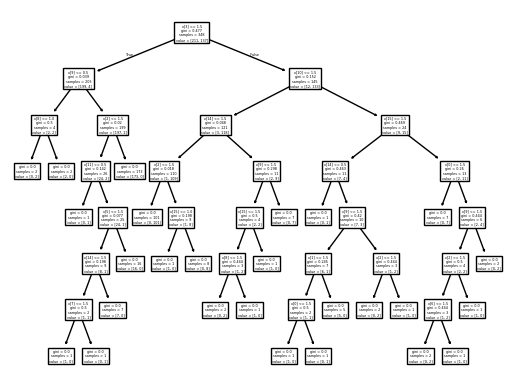

In [7]:
#Print induced trees for the voting and car data sets
from sklearn import tree

#voting dataset full tree
voting_data, meta = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_data)

for col in voting_df.columns:
    if voting_df[col].isnull().sum() > 0:
        voting_df[f'{col}_missing'] = voting_df[col].isnull().astype(int)
        voting_df[col].fillna('U')

label_encoder = LabelEncoder()
categorical_columns = voting_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    voting_df[col] = label_encoder.fit_transform(voting_df[col].astype(str))

voting_df = pd.get_dummies(voting_df, drop_first=True)
Data_Set_np = voting_df.to_numpy()

voting_X = Data_Set_np[:, :-1]
voting_y = Data_Set_np[:, -1]

voting_X_train, voting_X_test, voting_y_train, voting_y_test = train_test_split(voting_X, voting_y, test_size=0.2, random_state=42)

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

DTC.fit(voting_X_train, voting_y_train)
print('Voting DataSet Full Tree:')
tree.plot_tree(DTC)
print(DTC.feature_importances_)

Cars DataSet Full Tree:
[0.12690177 0.09682462 0.         0.12152567 0.06737879 0.12754945
 0.01828011 0.02877728 0.00654029 0.00359716 0.         0.02090849
 0.09613691 0.         0.08675785 0.11262391 0.08619769]


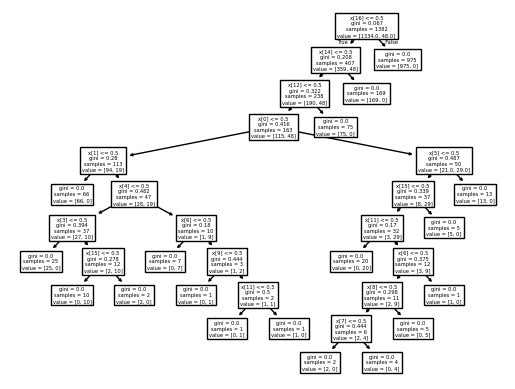

In [8]:
#cars full tree
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

cars_X = Data_Set_np[:, :-1]
cars_y = Data_Set_np[:, -1]

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, test_size=0.2, random_state=42)


cars_DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

cars_DTC.fit(cars_X_train, cars_y_train)
print('Cars DataSet Full Tree:')
tree.plot_tree(cars_DTC)
print(cars_DTC.feature_importances_)

Voting DataSet Max Depth 2 Tree:
[0.         0.         0.         0.95250532 0.         0.
 0.         0.         0.         0.01315825 0.03433644 0.
 0.         0.         0.         0.        ]


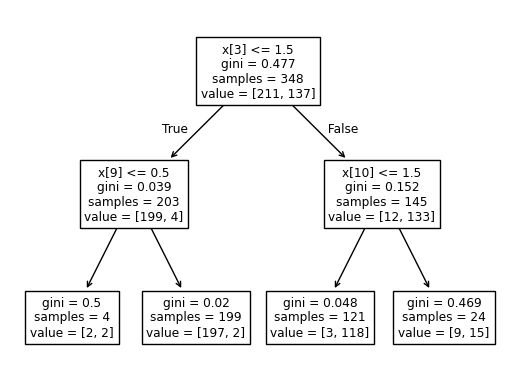

In [9]:
#voting dataset max depth 2
voting_data, meta = arff.loadarff('voting_with_missing.arff')
voting_df = pd.DataFrame(voting_data)

for col in voting_df.columns:
    if voting_df[col].isnull().sum() > 0:
        voting_df[f'{col}_missing'] = voting_df[col].isnull().astype(int)
        voting_df[col].fillna('U')

label_encoder = LabelEncoder()
categorical_columns = voting_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    voting_df[col] = label_encoder.fit_transform(voting_df[col].astype(str))

voting_df = pd.get_dummies(voting_df, drop_first=True)
Data_Set_np = voting_df.to_numpy()

voting_X = Data_Set_np[:, :-1]
voting_y = Data_Set_np[:, -1]

voting_X_train, voting_X_test, voting_y_train, voting_y_test = train_test_split(voting_X, voting_y, test_size=0.2, random_state=42)

small_DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

small_DTC.fit(voting_X_train, voting_y_train)
print('Voting DataSet Max Depth 2 Tree:')
tree.plot_tree(small_DTC)
print(small_DTC.feature_importances_)

Cars DataSet Max Depth 2 Tree:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.50161939 0.         0.49838061]


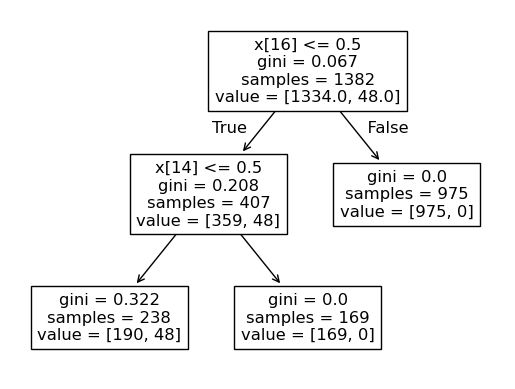

In [10]:
#cars max depth 2 tree
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

cars_X = Data_Set_np[:, :-1]
cars_y = Data_Set_np[:, -1]

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, test_size=0.2, random_state=42)

cars_small_DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=2, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

cars_small_DTC.fit(cars_X_train, cars_y_train)
print('Cars DataSet Max Depth 2 Tree:')
tree.plot_tree(cars_small_DTC)
print(cars_small_DTC.feature_importances_)

#### Discussion
Discuss what the Trees have learned on the 2 data sets (i.e. look at the induced trees and describe what "rules" they discovered). How do the important features you would think about correspond the the "feature_importances_"

It seems that the feature importances correspond to how many times a new feature is considered or a new branch is made. It brings into perspective which of the features are actually important when forming the tree, and which may be causing overfitting. The cars dataset, even with the 2 levels, was able to make a fairly pure tree, but the voting dataset's tree did not have any pure branches with only 2 levels. While both data had fairly deep trees where there was no depth limit, contrasting them with the max depth 2 trees highlights how giving a max depth criterion can still provide a decently accurate tree for some data.

### 2.4 (5%) Other Parameters
- For either of the data sets above experiment and discuss using a different split criterion (Compare Entropy and Log-loss with Gini)

Gini:
1.0
0.9855491329479769
[0.12690177 0.09682462 0.         0.12152567 0.06737879 0.12754945
 0.01828011 0.02877728 0.00654029 0.00359716 0.         0.02090849
 0.09613691 0.         0.08675785 0.11262391 0.08619769]


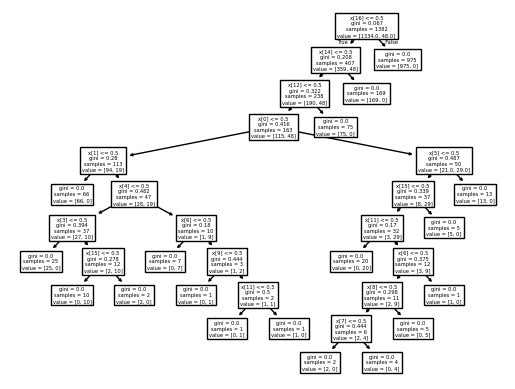

In [13]:
# Experiment with criterion parameter
#Entropy
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

cars_X = Data_Set_np[:, :-1]
cars_y = Data_Set_np[:, -1]

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, test_size=0.2, random_state=42)

dDTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
dDTC.fit(cars_X_train, cars_y_train)
print('Gini:')
print(dDTC.score(cars_X_train, cars_y_train))
print(dDTC.score(cars_X_test, cars_y_test))
tree.plot_tree(dDTC)
print(dDTC.feature_importances_)

Entropy:
1.0
0.9855491329479769
[0.06525148 0.09340738 0.         0.0522638  0.01813319 0.11071471
 0.00643486 0.02293389 0.00943993 0.         0.0025103  0.02204178
 0.10003687 0.         0.13437097 0.07084725 0.29161359]


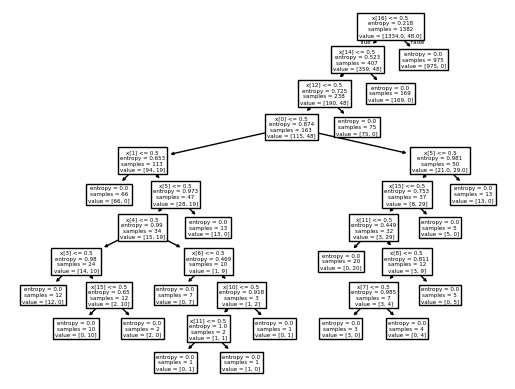

In [14]:
DTC = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print('Entropy:')
print(DTC.score(cars_X_train, cars_y_train))
print(DTC.score(cars_X_test, cars_y_test))
tree.plot_tree(DTC)
print(DTC.feature_importances_)

Log Loss:
1.0
0.9855491329479769
[0.06525148 0.09340738 0.         0.0522638  0.01813319 0.11071471
 0.00643486 0.02293389 0.00943993 0.         0.0025103  0.02204178
 0.10003687 0.         0.13437097 0.07084725 0.29161359]


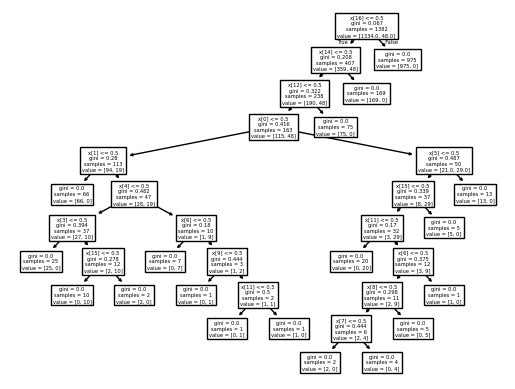

In [15]:
llDTC = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
llDTC.fit(cars_X_train, cars_y_train)
print('Log Loss:')
print(llDTC.score(cars_X_train, cars_y_train))
print(llDTC.score(cars_X_test, cars_y_test))
tree.plot_tree(dDTC)
print(llDTC.feature_importances_)

#### Discussion
How does using different split criteria (entropy, log-loss, and gini) affect accuracy, tree structure, and feature importance?

Between the tree criteriod the accuracy was not affected. Perhaps it would have been different with a different dataset, but for the cars dataset the accuracy was the same for each criterion. The tree structure did differ from the default with the Entropy criterion. This is probably bbecause the equation used to find entropy for the splits is different than the Gini equation, so the tree ends up being a little different. Suprisingly though, all the trees ended up with the same number of levels. Also, the feature importance values for both the entropy and log loss criterion ended up being different than the gini criterion. The values for entropy and log loss did end up being the same however. Even though the tree ended up looking different between these two criterion, the feature importance values prove how there are multiple ways to build the tree and still get the same results. This is also backed up by the accuracy values being all the same. Even though different criterion were used, different trees were built, and different features may have been used at each level, each criterion returned the same high accuracy for the dataset.

## 3 Overfit Avoidance with Decision Trees  

Above, you found typical training and test set scores for the Cars data set when the tree is induced as far as it can go (until classes are pure or there are no more data or attributes to split on).  This usually leads to great training set scores but can potentially overfit and get lower accuracy on the test set.  You will now experiment with methods which can help avoid overfit and which could lead to better test set accuracy (though training set accuracy may decrease).  

### 3.1 Smaller and Simpler Trees (20%)
- tree_: [Read about](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) the tree_ attribute with its sub attributes and methods allowing you to interact with your learned tree.  You don't have to do any specific task for this part.
- Use an 80/20 train/test split for all experiments in this part and induce (learn/fit) the full tree for Cars.
- For the fully induced tree print out
    - Training set accuracy
    - Test set accuracy
    - Total number of nodes (clf.tree_.node_count)
    - Maximum tree depth (clf.tree_.max_depth)
- Experiment with the following parameters which lead to smaller and/or simpler trees which can help with overfit.  Try a few different values of each parameter and compare their train and test set accuracies and number of nodes and depth with the fully induced tree.  If you are not sure how parameters are actually working, print some trees to see their effect.  Due to the simplicity of the Cars data set you may not see as great of accuracy improvements as you would for cases where overfit is more prominent.  
    - min_samples_leaf
    - min_samples_split
    - min_impurity_decrease
- Try these parameters also, but note that they could lead to underfit
    - max_depth
    - max_leaf_nodes
    - max_features

In [18]:
# Explore different overfit parameters
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

cars_X = Data_Set_np[:, :-1]
cars_y = Data_Set_np[:, -1]

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, test_size=0.2, random_state=42)

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("Default:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')

Default:
Training set accuracy: 1.0
Test set accuracy: 0.9855491329479769
Number of nodes: 35
Tree Depth: 10


In [19]:
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_samples_leaf = 2:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=10, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_samples_leaf = 10:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')

min_samples_leaf = 2:
Training set accuracy: 0.9992764109985528
Test set accuracy: 0.9855491329479769
Number of nodes: 29
Tree Depth: 9

min_samples_leaf = 10:
Training set accuracy: 0.992040520984081
Test set accuracy: 0.9884393063583815
Number of nodes: 19
Tree Depth: 7


In [21]:
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=4,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_samples_split = 4:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=10,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_samples_split = 10:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')

min_samples_split = 4:
Training set accuracy: 0.9992764109985528
Test set accuracy: 0.9855491329479769
Number of nodes: 31
Tree Depth: 10

min_samples_split = 10:
Training set accuracy: 0.9978292329956585
Test set accuracy: 0.9855491329479769
Number of nodes: 29
Tree Depth: 9


In [25]:
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.005, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_impurity_decrease = 0.005:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.05, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("min_impurity_decrease = 0.05:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')

min_impurity_decrease = 0.005:
Training set accuracy: 0.984081041968162
Test set accuracy: 0.9797687861271677
Number of nodes: 15
Tree Depth: 6

min_impurity_decrease = 0.05:
Training set accuracy: 0.9652677279305355
Test set accuracy: 0.9508670520231214
Number of nodes: 1
Tree Depth: 0


In [26]:
#max_depth
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=3, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_depth = 5:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=8, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_depth = 8:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

#max_leaf_nodes
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=10, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_leaf_nodes = 10:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=20, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_leaf_nodes = 20:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

#max_features
DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="sqrt", random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_features = sqrt:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')
print()

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features="log2", random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
DTC.fit(cars_X_train, cars_y_train)
print("max_features = log2:")
print(f'Training set accuracy: {DTC.score(cars_X_train, cars_y_train)}')
print(f'Test set accuracy: {DTC.score(cars_X_test, cars_y_test)}')
print(f'Number of nodes: {DTC.tree_.node_count}')
print(f'Tree Depth: {DTC.tree_.max_depth}')

max_depth = 5:
Training set accuracy: 0.9652677279305355
Test set accuracy: 0.9508670520231214
Number of nodes: 7
Tree Depth: 3

max_depth = 8:
Training set accuracy: 0.9978292329956585
Test set accuracy: 0.9855491329479769
Number of nodes: 29
Tree Depth: 8

max_leaf_nodes = 10:
Training set accuracy: 0.9956584659913169
Test set accuracy: 0.9913294797687862
Number of nodes: 19
Tree Depth: 7

max_leaf_nodes = 20:
Training set accuracy: 1.0
Test set accuracy: 0.9855491329479769
Number of nodes: 35
Tree Depth: 10

max_features = sqrt:
Training set accuracy: 1.0
Test set accuracy: 0.9797687861271677
Number of nodes: 113
Tree Depth: 13

max_features = log2:
Training set accuracy: 1.0
Test set accuracy: 0.9797687861271677
Number of nodes: 113
Tree Depth: 13


#### Discussion
How did the methods used above help avoid overfit? How do you know? How did they affect accuracy (training and test) and tree structure? Which parameters helped the most with each dataset? How do you know?

Using these methods made it so the model did not fit the training data exactly, and kept the accuracy of the training data just shy of 1 as to avoid overfitting. This meant that for this dataset the accuracy of the test set also declined slightly for most of them, but it still remained high. This proves that these methods can be good resources for decreasing the chance of the model overfitting to the training data. The tree structure was also affect by each, by either decreasing the number of nodes or the depth of the tree for most of the parameters. Notably, the min_samples_leaf, min_samples_split, and min_impurity_decrease parameters all decreased the number of nodes and levels the tree had, with the min_impurity_decrease having the most drastic affect. With regard to tree structure, the most surprising effect came from the max_features parameter. Instead of decreasing the size of the tree, it increased the size of the tree. To me this seems that for this data, but changing the parameter of the max_features to sqrt and log2, it actually overfit the tree more than the default max_features did. Overall, the min_samples_leaf and the min_samples_split had the best effect to not overfit the data by keepign the accuracy high, while also decreasing the size of the tree.

### 3.2 (10%) Tree Reduction
Another approach to avoiding overfit is using pruning to reduce fully induced trees.  Induce the tree fully for Cars (no simplifying parameters such as max_depth).  Prune by setting the [ccp_alpha](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py) parameter to a positive value. This parameter controls how aggressive the pruning is. Try some small values (e.g. ,001, ,005, etc.) and try to find and report the value which works the best.  Make a table with at least 5 ccp_alpha values and for each value include
- Training set accuracy (you chooses the size of the train/test split)
- Test set accuracy
- Total number of nodes (clf.tree_.node_count)
- Maximum tree depth (clf.tree_.max_depth)

In [31]:
# Pruning
data, meta = arff.loadarff("cars.arff")
df = pd.DataFrame(data)
label_encoder = LabelEncoder()
cars_df = pd.get_dummies(df, drop_first=True)
Data_Set_np = cars_df.to_numpy()

cars_X = Data_Set_np[:, :-1]
cars_y = Data_Set_np[:, -1]

cars_X_train, cars_X_test, cars_y_train, cars_y_test = train_test_split(cars_X, cars_y, test_size=0.2, random_state=42)

alpha_values = [0.0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05]

training_accuracy = []
test_accuracy = []
total_nodes = []
max_tree_depth = []

for i in alpha_values:
  DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=42,
                             max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=i)
  DTC.fit(cars_X_train, cars_y_train)
  training_accuracy.append(DTC.score(cars_X_train, cars_y_train))
  test_accuracy.append(DTC.score(cars_X_test, cars_y_test))
  total_nodes.append(DTC.tree_.node_count)
  max_tree_depth.append(DTC.tree_.max_depth)

data = {
    "Alpha Values": alpha_values,
    "Training Accuracy": training_accuracy,
    "Test Accuracy": test_accuracy,
    "Total Number of Nodes": total_nodes,
    "Maximum Tree Depth": max_tree_depth
}
df = pd.DataFrame(data)
print(df)

   Alpha Values  Training Accuracy  Test Accuracy  Total Number of Nodes  \
0        0.0000           1.000000       0.985549                     35   
1        0.0001           1.000000       0.985549                     35   
2        0.0005           0.999276       0.985549                     29   
3        0.0010           0.997106       0.994220                     21   
4        0.0050           0.995658       0.991329                     19   
5        0.0100           0.965268       0.950867                      1   
6        0.0500           0.965268       0.950867                      1   

   Maximum Tree Depth  
0                  10  
1                  10  
2                  10  
3                   8  
4                   7  
5                   0  
6                   0  


#### Discussion
How did the pruning parameter ccp_alpha affect accuracy and tree structure? How does that compare to the methods above?

AS the ccp_alpha value increased, the accuracy and the size of the tree decreased. Compared to the other parameters, this one seemed to decreased the size of the tree and the accuracy at a faster rate than the others. However, even though the tree quickly became only 1 node big, it then plateaued at an accuracy of 95%. While the other parameters may have caused the test accuracy to continue to increase, it seems that once the tree becomes only one node, the accuracy of the model does not change.

## 4. Decision Tree Regression
### 4.1 (15%) Learn a real-world regression data set of your choice (not already used in this or previous labs)
- Report tree statistics (# of nodes, # of leaf nodes, max depth)
- Report MAE on the training and test set (you choose the size of the train/test split)
- Report the DT regressor score for the training and test set.  Note that for the DT regressor this score is the coefficient of determination. Google it if you are curious.

In [34]:
#Learn regression data set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

df = pd.read_csv("student-mat.csv", sep=";")
y = df["G3"]
X = df.drop(columns=["G3"])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeRegressor(criterion='squared_error', splitter='best', max_depth=None,
                            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                            max_features=None, random_state=42, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
clf.fit(X_train, y_train)
print(f'Total Nodes: {clf.tree_.node_count}')
print(f'Total Leaf Nodes: {clf.tree_.n_leaves}')
print(f'Tree Depth: {clf.tree_.max_depth}')
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error (Training Data): {train_mae}')
print(f'Mean Absolute Error (Testing Data): {test_mae}')

Total Nodes: 231
Total Leaf Nodes: 116
Tree Depth: 12
Mean Absolute Error (Training Data): 0.0
Mean Absolute Error (Testing Data): 1.3109243697478992


#### Discussion
Discuss your choice of dataset and regression feature. Also discuss the items listed above in 4.1

I chose the student performance dataset, specifically focusing on predicting the student's math scores. I left the regression with the default criterion, the squared error, because this minimizes the L2 loss for each split which is ideal. This dataset has 30 features which contribute to a student's final grade, so it was a good dataset to use to test the regressor on building a tree with a lot of features. The tree ended up being quite big, with 231 total nodes, and a depth of 12. Since I left the max_depth equal to none, the tree ended up with 116 leaf nodes, or in other words, 116 pure nodes. Because of the gigantic nature of this tree, it could be overfitting. There was no error for the training data, but some error for the testing data. Because the model was able to run until every node was pure, it probably did overfit the data, which is causing the testing dataset to have a higher error than the training data set.

## 5. (Optional 15% extra credit) Code up your own C4.5 Decision Tree Learner
Implement the C4.5 algorithm discussed in class and in the slides, NOT the CART algorithm.  Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Use standard information gain as your basic attribute evaluation metric.  Note that C4.5 would usually augment information gain with a mechanism to penalize statistically insignificant attribute splits to avoid overfit (e.g. early stopping, gain ratio, etc.), but you are not required to do that.
- Include the ability to handle unknown attributes by making "unknown" a new attribute value when needed.
- You do not need to handle real valued attributes.
- It is a good idea to use simple data set (like the pizza homework), which you can check by hand, to test each detailed step of your algorithm to make sure it works correctly.
- Run your algorithm on the voting data set above with unknown attributes and compare your results with CART.

Discussion

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class DTClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self,counts=None):
        """ Initialize class with chosen hyperparameters.
        Args:
        Optional Args (Args we think will make your life easier):
            counts: A list of Ints that tell you how many types of each feature there are
        Example:
            DT  = DTClassifier()
            or
            DT = DTClassifier(count = [2,3,2,2])
            Dataset =
            [[0,1,0,0],
            [1,2,1,1],
            [0,1,1,0],
            [1,2,0,1],
            [0,0,1,1]]

        """

    def fit(self, X, y):
        """ Fit the data; Make the Decision tree

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 1D numpy array with the training targets

        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets

        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass


    def score(self, X, y):
        """ Return accuracy(Classification Acc) of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 1D numpy array of the targets
        """
        return 0

In [ ]:
# Optional Debugging Dataset - Pizza Homework
# pizza_dataset = np.array([[1,2,0],[0,0,0],[0,1,1],[1,1,1],[1,0,0],[1,0,1],[0,2,1],[1,0,0],[0,2,0]])
# pizza_labels = np.array([2,0,1,2,1,2,1,1,0])